## PIP

In [1]:
!pip install selenium

In [33]:
!pip install requests

In [34]:
!pip install bs4

In [166]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 197.7 kB/s eta 0:00:00 kB/s eta 0:00:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 5.2 MB/s eta 0:00:00m eta 0:00:010:01:01


In [280]:
!pip install wordcloud

## Import

In [22]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from time import sleep
import os
import requests
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd
import nltk
from nltk.corpus import stopwords
import pymorphy3
import re
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist

## Настройки Selenium

In [132]:
#Опции для Chrome
options = webdriver.ChromeOptions()
options.add_argument("--ignore-certificate-errors")
options.add_argument("--allow-insecure-localhost")
options.add_argument("--start-maximized")  #Открытие в полном окне
driver = webdriver.Chrome(options=options)

#переход на сайт
driver.get("https://io.tsu.ru/news")

## Подготовка страницы и создание объекта bs4

In [133]:
#Функция скрола страницы. 
for i in range(1): #Указываем n раз
  driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
  sleep(3)

In [53]:
#Извлечение кода страницы
html = driver.page_source

#Создание soup на основе кода страницы
soup = BeautifulSoup(html, "html.parser")

print(soup)

<html><head><meta charset="utf-8"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/> <meta content="c49dc1807193fad5" name="yandex-verification"/><!--metatextblock--><title>Новости Института образования ТГУ</title><meta content="https://io.tsu.ru/news" property="og:url"/><meta content="Новости Института образования ТГУ" property="og:title"/><meta content="" property="og:description"/><meta content="website" property="og:type"/><link href="https://io.tsu.ru/news" rel="canonical"/><!--/metatextblock--><meta content="telephone=no" name="format-detection"/><meta content="on" http-equiv="x-dns-prefetch-control"/><link href="https://ws.tildacdn.com" rel="dns-prefetch"/><link href="https://static.tildacdn.com" rel="dns-prefetch"/><link href="https://static.tildacdn.com/tild3633-3238-4533-b265-303265653239/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="https://static.tildacdn.com/tild36

## Извличение ссылок

In [90]:
#создание пустого list
url = []

#поиск ссылок из soup и добавление их в список
url = [link.get("href") for link in soup.find_all("a", class_="t-feed__link js-feed-post-link")]

In [91]:
#преобразовываем в DataFrame
df = pd.DataFrame(url, columns=['url'])
df.to_csv('urlIO_df.csv', index=False) #сохраняем

## check point 

In [343]:
#проверка
df = pd.read_csv('urlIO_df.csv') #загружаем бд
df

,url
0,https://io.tsu.ru/tutorcenter/tpost/szy7a3y3b1...
1,https://io.tsu.ru/news/tpost/l66pvy4061-progra...
2,https://io.tsu.ru/model-razvitia-ped-obrazovan...
3,https://io.tsu.ru/tutorcenter/tpost/puk0761xs1...
4,https://io.tsu.ru/tutorcenter/tpost/lhxlu56ov1...
...,...
95,https://io.tsu.ru/sociologyofeducationcentre/t...
96,https://io.tsu.ru/k21center/tpost/738agonxf1-i...
97,https://io.tsu.ru/sociologyofeducationcentre/t...
98,https://io.tsu.ru/model-razvitia-ped-obrazovan...


## Ссылки -> текст

In [134]:
#создание пустого list
info = []

In [135]:
#Используем selenium, чтобы он прогрузил страницу, а потом bs добавит все в суп
for link in df['url']:
    driver.get(link)  # Переход по ссылке
    soup = bs(driver.page_source, 'html.parser') #Создание soup на основе кода страницы

    #заголовок
    title_wrapper = soup.find("div", class_="t-feed__post-popup__title-wrapper")
    headline = title_wrapper.find('h1').text.strip() 

    #текст
    article_body = soup.find("div", itemprop="articleBody")
    article = " ".join([p.text.strip() for p in article_body.find_all("div", class_="t-redactor__text")]) 
    #дата
    date_element = soup.find('span', class_="js-feed-post-date")
    date = date_element.text.strip()

    #все в список
    info.append({
        'url': link,
        'date': date,
        'headline': headline,
        'article': article,
    })

In [136]:
#список в DataFrame
info_df = pd.DataFrame(info)
info_df.to_csv('dataIO2324_df.csv', index=False) #сохраняем

## check point 

In [60]:
#проверка
info = pd.read_csv('dataIO2324_df.csv') #загружаем бд
info

,url,date,headline,article
0,https://io.tsu.ru/tutorcenter/tpost/szy7a3y3b1...,28.12.2024,Курс «Погружение в университетскую среду» отме...,Тьюторская служба ТГУ награждена премией Томск...
1,https://io.tsu.ru/news/tpost/l66pvy4061-progra...,24.12.2024,Программа летней смены ЦРСК для школьников — п...,Программа летней смены «Билет в будущее: дерза...
2,https://io.tsu.ru/model-razvitia-ped-obrazovan...,10.12.2024,Студенты ТГУ приняли участие в университетской...,Студенты 10 факультетов и учебных институтов Т...
3,https://io.tsu.ru/tutorcenter/tpost/puk0761xs1...,10.12.2024,Школьники и студенты разрабатывали ИИ-решения ...,В Томском государственном университете прошла ...
4,https://io.tsu.ru/tutorcenter/tpost/lhxlu56ov1...,04.12.2024,Институт образования ТГУ выступил соорганизато...,Представители Института образования ТГУ стали ...
...,...,...,...,...
95,https://io.tsu.ru/sociologyofeducationcentre/t...,28.04.2023,О сотрудничестве в исследованиях образования г...,Сотрудники Института образования ТГУ провели к...
96,https://io.tsu.ru/k21center/tpost/738agonxf1-i...,24.04.2023,Интенсив по геномике для школьников и студенто...,Институт образования ТГУ выступил соорганизато...
97,https://io.tsu.ru/sociologyofeducationcentre/t...,20.04.2023,Исследователи института образования приняли уч...,"Мария Абрамова, директор центра социологии обр..."
98,https://io.tsu.ru/model-razvitia-ped-obrazovan...,03.04.2023,Сотрудники ЦРСК провели Школу вожатых для псих...,С 27 по 30 марта в гимназии №1 Стрежевого сотр...


## Предпроцессинг

In [61]:
#загрузка стоп-слов
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/marson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
#С какой колонкой работаем
info['prep'] = info['article']

In [63]:
#список стоп слов
stop_word = {"мария", "абрамова", "который", "который ", " который" "также", "свой", "это", "институт", "тгу", "тгуть", "вузовз", "скб", "около", "hitsпосле", 
             "vrбитва", "ия", "тгукоманда", "образование", "ио", " также", "также ", "год", "вуз", "день", "университет", "томский"}

In [64]:
#Импорт стоп-слов + функция, которая удаляет их
STOPWORDS = set(stopwords.words('russian'))
allstop = STOPWORDS.union(stop_word) #объединил со своим стоп словами.
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in allstop])

In [65]:
#Все в нижний регистр, удаление стоп-слов
info['prep'] = (
    info['prep']
    .str.lower()  # В нижний регистр
    .str.replace(r'[^\w\s]', '', regex=True)  # Удаляем все символы, кроме букв и пробелов
    .apply(remove_stopwords)  # Удаляем стоп-слова
)

In [66]:
#Удаление всех небуквенных символов
i = 0
info_prep = info['prep']
for lists in info_prep:
    info_prep.loc[i] = re.sub(r'[^\w\s\r]+|[\d]+', '', lists) 
    i += 1

## check point 

In [67]:
info

,url,date,headline,article,prep
0,https://io.tsu.ru/tutorcenter/tpost/szy7a3y3b1...,28.12.2024,Курс «Погружение в университетскую среду» отме...,Тьюторская служба ТГУ награждена премией Томск...,тьюторская служба награждена премией томского ...
1,https://io.tsu.ru/news/tpost/l66pvy4061-progra...,24.12.2024,Программа летней смены ЦРСК для школьников — п...,Программа летней смены «Билет в будущее: дерза...,программа летней смены билет будущее дерзай от...
2,https://io.tsu.ru/model-razvitia-ped-obrazovan...,10.12.2024,Студенты ТГУ приняли участие в университетской...,Студенты 10 факультетов и учебных институтов Т...,студенты факультетов учебных институтов томск...
3,https://io.tsu.ru/tutorcenter/tpost/puk0761xs1...,10.12.2024,Школьники и студенты разрабатывали ИИ-решения ...,В Томском государственном университете прошла ...,томском государственном университете прошла си...
4,https://io.tsu.ru/tutorcenter/tpost/lhxlu56ov1...,04.12.2024,Институт образования ТГУ выступил соорганизато...,Представители Института образования ТГУ стали ...,представители института образования стали учас...
...,...,...,...,...,...
95,https://io.tsu.ru/sociologyofeducationcentre/t...,28.04.2023,О сотрудничестве в исследованиях образования г...,Сотрудники Института образования ТГУ провели к...,сотрудники института образования провели кругл...
96,https://io.tsu.ru/k21center/tpost/738agonxf1-i...,24.04.2023,Интенсив по геномике для школьников и студенто...,Институт образования ТГУ выступил соорганизато...,образования выступил соорганизатором трехдневн...
97,https://io.tsu.ru/sociologyofeducationcentre/t...,20.04.2023,Исследователи института образования приняли уч...,"Мария Абрамова, директор центра социологии обр...",директор центра социологии образования анастас...
98,https://io.tsu.ru/model-razvitia-ped-obrazovan...,03.04.2023,Сотрудники ЦРСК провели Школу вожатых для псих...,С 27 по 30 марта в гимназии №1 Стрежевого сотр...,марта гимназии стрежевого сотрудники центра...


## Лемматизация pymorhy3

In [68]:
#вызов
morph = pymorphy3.MorphAnalyzer()
#лемматизация
def lemmatize_pym(text):
    return " ".join([morph.parse(word)[0].normal_form for word in text.split()])

In [69]:
#с какой колонкой работаем
info['lem'] = info['prep'].apply(lemmatize_pym)

## Токенизация

In [70]:
#с какой колонкой работаем
info['token'] = info['lem']

In [13]:
#токенизация
all_texts = []
tokenizer = RegexpTokenizer(r'\w+')

i = 0
for texts in info['token']:
    info.token[i] = tokenizer.tokenize(str(texts))
    all_texts.extend(info.token[i])
    i += 1

/tmp/ipykernel_7629/573597378.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  info.token[i] = tokenizer.tokenize(str(texts))
/tmp/ipykernel_7629/573597378.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!


## лингвистическая разметка pymorhy3

In [310]:
#лексема
def lexem(text2):
    return [morph.parse(word)[0].lexeme for word in text2]

#с какой колонкой работаем
info['lexeme'] = info['token'].apply(lexem)

## check point 

In [71]:
info

,url,date,headline,article,prep,lem,token
0,https://io.tsu.ru/tutorcenter/tpost/szy7a3y3b1...,28.12.2024,Курс «Погружение в университетскую среду» отме...,Тьюторская служба ТГУ награждена премией Томск...,тьюторская служба награждена премией томского ...,тьюторский служба наградить премия томский уни...,тьюторский служба наградить премия томский уни...
1,https://io.tsu.ru/news/tpost/l66pvy4061-progra...,24.12.2024,Программа летней смены ЦРСК для школьников — п...,Программа летней смены «Билет в будущее: дерза...,программа летней смены билет будущее дерзай от...,программа летний смена билет будущее дерзать о...,программа летний смена билет будущее дерзать о...
2,https://io.tsu.ru/model-razvitia-ped-obrazovan...,10.12.2024,Студенты ТГУ приняли участие в университетской...,Студенты 10 факультетов и учебных институтов Т...,студенты факультетов учебных институтов томск...,студент факультет учебный институт томский гос...,студент факультет учебный институт томский гос...
3,https://io.tsu.ru/tutorcenter/tpost/puk0761xs1...,10.12.2024,Школьники и студенты разрабатывали ИИ-решения ...,В Томском государственном университете прошла ...,томском государственном университете прошла си...,томский государственный университет пройти сиб...,томский государственный университет пройти сиб...
4,https://io.tsu.ru/tutorcenter/tpost/lhxlu56ov1...,04.12.2024,Институт образования ТГУ выступил соорганизато...,Представители Института образования ТГУ стали ...,представители института образования стали учас...,представитель институт образование стать участ...,представитель институт образование стать участ...
...,...,...,...,...,...,...,...
95,https://io.tsu.ru/sociologyofeducationcentre/t...,28.04.2023,О сотрудничестве в исследованиях образования г...,Сотрудники Института образования ТГУ провели к...,сотрудники института образования провели кругл...,сотрудник институт образование провести круглы...,сотрудник институт образование провести круглы...
96,https://io.tsu.ru/k21center/tpost/738agonxf1-i...,24.04.2023,Интенсив по геномике для школьников и студенто...,Институт образования ТГУ выступил соорганизато...,образования выступил соорганизатором трехдневн...,образование выступить соорганизатор трёхдневны...,образование выступить соорганизатор трёхдневны...
97,https://io.tsu.ru/sociologyofeducationcentre/t...,20.04.2023,Исследователи института образования приняли уч...,"Мария Абрамова, директор центра социологии обр...",директор центра социологии образования анастас...,директор центр социология образование анастаси...,директор центр социология образование анастаси...
98,https://io.tsu.ru/model-razvitia-ped-obrazovan...,03.04.2023,Сотрудники ЦРСК провели Школу вожатых для псих...,С 27 по 30 марта в гимназии №1 Стрежевого сотр...,марта гимназии стрежевого сотрудники центра...,март гимназия стрежевой сотрудник центр развит...,март гимназия стрежевой сотрудник центр развит...


In [72]:
info.to_csv('alldataIO2324_df.csv', index=False) #сохраню

## тут слова хотел подсчитать

In [73]:
#удаление стоп-слов
clean= [remove_stopwords(text) for text in all_texts]  # Удаляем стоп-слова

In [74]:
# Подсчет вхождений слов
counts = FreqDist(clean)
counts

FreqDist({'': 1704, 'студент': 306, 'программа': 254, 'образовательный': 221, 'высокий': 143, 'проект': 136, 'новый': 134, 'также': 133, 'участник': 133, 'развитие': 118, ...})

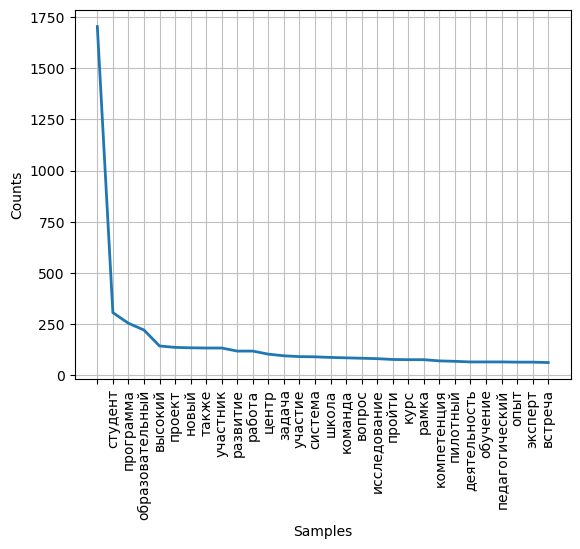

<Axes: xlabel='Samples', ylabel='Counts'>

In [75]:
counts.plot(30,cumulative=False)

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
text_raw = " ".join(clean)

In [78]:
wordcloud = WordCloud(background_color='white', width=1400, height=1000).generate(text_raw)

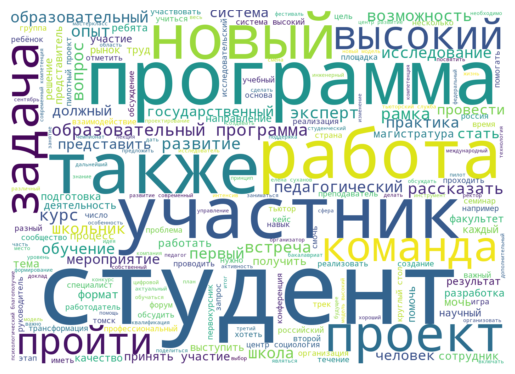

In [79]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
wordcloud.to_file("wordcloud_result.png")

## TF-IDF

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

In [82]:
texts = info.lem

In [83]:
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(texts)

In [84]:
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]

In [85]:
# Вычисление TF-IDF
df1 = pd.DataFrame(
    first_vector_tfidfvectorizer.T.todense(),
    index=tfidf_vectorizer.get_feature_names_out(),
    columns=["tfidf"])
df1.sort_values(by=["tfidf"],ascending=False)

,tfidf
курс,0.332602
балл,0.190416
служба,0.176143
тьюторский,0.164651
университетский,0.146760
...,...
креативность,0.000000
креативный,0.000000
кризисазакать,0.000000
кризисный,0.000000


In [86]:
df2 = df1.sort_values(by=["tfidf"],ascending=False)

In [87]:
df2

,tfidf
курс,0.332602
балл,0.190416
служба,0.176143
тьюторский,0.164651
университетский,0.146760
...,...
креативность,0.000000
креативный,0.000000
кризисазакать,0.000000
кризисный,0.000000


In [88]:
# Сохранение результата в CSV файл
df2.to_csv('tfidf_result.csv', encoding='utf-8')